# Chapter 6 Solutions

## Problem 6.3

The discrete version of the homogeneous wave equation

$\partial_t^2 s = \beta^2\, \partial_x^2 s$
is given in Eqn. 6.20 as 

$s_j^{n+1} = 2 s^n_j - s^{n-1}_j + \frac{\beta^2 (\Delta t)^2}{(\Delta x)^2} \left( s^n_{j+1} - 2s^n_j + s^n_{j-1} \right)$


First let us define some parameters: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from copy import copy

In [2]:
L     = 100     # length of domain 
dx    = 0.1     # spatial discretiation
beta  = 1       # constant wavespeed


# Initial condition: 
def apply_initial_condition(x, s):
    """
    Applies initial condition defined in Eqn 6.21 
    x   1D numpy array of spatial positions (array x)
    s   1D numpy array of displacement variable (array s)
    """
    s = np.exp(-0.1 * (x-50)**2)
    return s 

We can create our grid of points, x, using a numpy array. Note that using L as our upper bound in the arange function produces an array of values up to L - dx, hence we use L+dx so that the last element of the array has value L:

In [3]:
# Create array x
x = np.arange(0, L+dx, dx)

# Length of array x
N = len(x)

Next we create an empty numpy array to hold the displacement values, with the same length as x: 

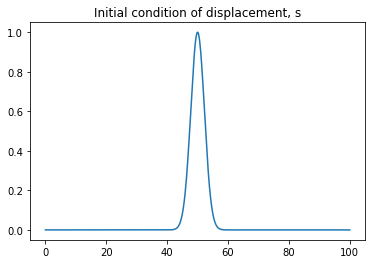

In [4]:
s      = np.zeros(N)
s_prev = np.zeros(N)

# Apply initial condition to s: 
s = apply_initial_condition(x,s)

# Plot initial condition
fig, ax = plt.subplots()
ax.set_title('Initial condition of displacement, s')
ax.plot(x,s)

### Timestepping

We can define a function that computes the displacement at timestep $n+1$ based on equation 6.20: 

$s_j^{n+1} = 2 s^n_j - s^{n-1}_j + \frac{\beta^2 (\Delta t)^2}{(\Delta x)^2} \left( s^n_{j+1} - 2s^n_j + s^n_{j-1} \right)$

Note here that problem 6.3 requires us to investigate the effect of varying $a$, where 
$\Delta t = \alpha \Delta x / \beta $ which we can rearrange to
$\alpha = \beta \Delta t / \Delta x   $ such that we can write the timestepping condition equation in terms of $\alpha$ as 

$s_j^{n+1} = 2 s^n_j - s^{n-1}_j + \alpha^2 \left( s^n_{j+1} - 2s^n_j + s^n_{j-1} \right)$

In [5]:
def step_in_time(s, s_prev, alpha, use_Dirichlet_bc): 
    '''
    Function computes one timestep of s and applies the boundary 
    condition. 
    Inputs: 
    s       
       1D np array of displacement variable at timestep n
    s_prev  
       1D np array of displacement at timestep n-1
    alpha   
       float value defined in problem 
    use_Dirichlet_bc   
       boolean value, if True then applies Dirichlet bc
                      if False then applies Neumann bc
    
    Outputs: 
    s_new
       updated displacement at n+1 
    s
       displacement at time n which will be used as 's_prev in next timestep'          
    '''
    # Compute the first two terms of the equation
    # this applies to all elements in the array
    s_new = 2*s - s_prev
    
    # Now we add the 3rd term, which affects all elements of the
    # array except for the first and last elements (boundaries)
    s_new[1:-1] += (alpha**2)*( s[2:] - 2*s[1:-1] + s[:-2])
    
    
    # Apply boundary condition
    if use_Dirichlet_bc: 
        s_new[0]  = 0 
        s_new[-1] = 0 
    else: 
        # Neumann boundary condition
        s_new[0]  = s_new[1]
        s_new[-1] = s_new[-2]
    return s_new, s 

### Dealing with previous timestep? 

At time = 0, what should be in our 'previous timestep' array of displacement? Lets just assume that the system was in the same state as at the initial condition, so s_prev = s. 

## Dirichlet BC - $\alpha = 0.5$

Lets start with $\alpha = 0.5$ and see what happens. To see how the system evolves, we will loop over 2000 timesteps, and plot the system at every 200th iteration 

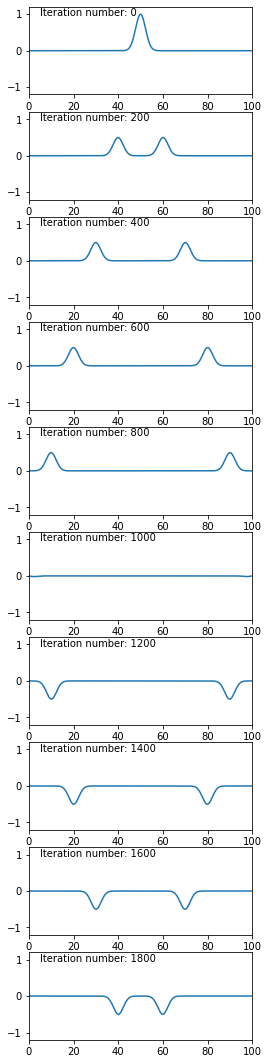

In [6]:
# To begin with let us assume that the initial condition holds for any time before 0, such that s_prev
# is the same as s 
# Lets also ensure our boundary condition is applied
s = apply_initial_condition(x,s)
s_prev = s 

# Simulation parameters: 
alpha         = 0.5
use_dirichlet = True
ntimesteps    = 2000

# Plotting
nplots = 10 
fig, ax = plt.subplots(nplots, figsize=(4,19))
iax = 0 

# Loop over the timesteps
for i in range(ntimesteps):
    s, s_prev = step_in_time(s, s_prev, alpha, use_Dirichlet_bc=use_dirichlet)
    
    if i%200 == 0: 
        # This means if the remainder of division is 0
        
        # Plot the wave
        ax[iax].plot(x, s)
        
        # Add some annotations
        ax[iax].text(x=5, y = 0.95, s=f"Iteration number: {i}")
        # Set plot limits for each axis:
        ax[iax].set_xlim([0,100])
        ax[iax].set_ylim([-1.2,1.2])
        iax +=1 



We notice a few key things: 

(1) The reflection at the boundary causes a change in the polarity of the waves\
(2) The wavefield is smooth well resolved\
(3) Energy is well-conserved within the system

If you try to run this code with $\alpha = 1.5$ you will get a runtime error due to numerical overflow. This is because the system is unstable and the values are growing through time. 

You should find that $\alpha = 1$ is the cutoff for this behaviour. In the code below, you can try experimenting with the precision of the alpha being used. For example, what if alpha is 1.0001 or 1.00001? How many timesteps occur before the system blows up? 

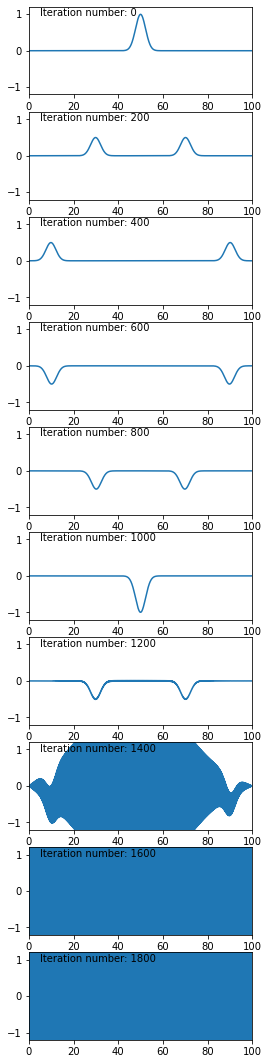

In [10]:
# To begin with let us assume that the initial condition holds for any time before 0, such that s_prev
# is the same as s 
# Lets also ensure our boundary condition is applied
s = apply_initial_condition(x,s)
s_prev = s 

# Simulation parameters: 
alpha         = 1.0001
use_dirichlet = True
ntimesteps    = 2000

# Plotting
nplots = 10 
fig, ax = plt.subplots(nplots, figsize=(4,19))
iax = 0 

# Loop over the timesteps
for i in range(ntimesteps):
    s, s_prev = step_in_time(s, s_prev, alpha, use_Dirichlet_bc=use_dirichlet)
    
    if i%200 == 0: 
        # This means if the remainder of division is 0
        
        # Plot the wave
        ax[iax].plot(x, s)
        
        # Add some annotations
        ax[iax].text(x=5, y = 0.95, s=f"Iteration number: {i}")
        # Set plot limits for each axis:
        ax[iax].set_xlim([0,100])
        ax[iax].set_ylim([-1.2,1.2])
        iax +=1 



## Neumann BC - $\alpha = 0.5$

Lets now look at with $\alpha = 0.5$ for Neumann boundary condition. 

The major observed difference is the change in polarity observed above with the Dirichlet condition is no longer observed. Instead of the end point being 'fixed' as above, the end point is 'free' to move around, as observed at iteration 1000. Note that in the Dirichlet condition the end points never have a non-zero displacement (as is the nature of their boundary condition). 

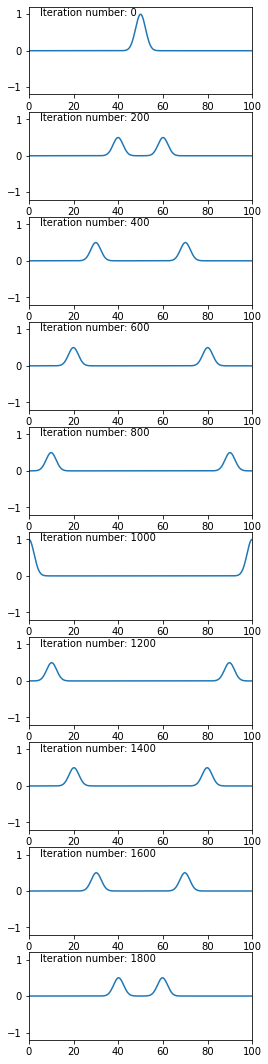

In [8]:
# To begin with let us assume that the initial condition holds for any time before 0, such that s_prev
# is the same as s 
# Lets also ensure our boundary condition is applied
s = apply_initial_condition(x,s)
s_prev = s 

# Simulation parameters: 
alpha         = 0.5
use_dirichlet = False
ntimesteps    = 2000

# Plotting
nplots = 10 
fig, ax = plt.subplots(nplots, figsize=(4,19))
iax = 0 

# Loop over the timesteps
for i in range(ntimesteps):
    s, s_prev = step_in_time(s, s_prev, alpha, use_Dirichlet_bc=use_dirichlet)
    
    if i%200 == 0: 
        # This means if the remainder of division is 0
        
        # Plot the wave
        ax[iax].plot(x, s)
        
        # Add some annotations
        ax[iax].text(x=5, y = 0.95, s=f"Iteration number: {i}")
        # Set plot limits for each axis:
        ax[iax].set_xlim([0,100])
        ax[iax].set_ylim([-1.2,1.2])
        iax +=1 

